In [258]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [259]:
def define_pandas_options():
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)

In [348]:
play_df = pd.read_csv('d20_intermediate_files/play_results.csv')
frame_df = pd.read_csv('d20_intermediate_files/frame_results.csv')
tracking_df = pd.read_csv('d20_intermediate_files/tracking_results.csv')

In [349]:
play_df.head()

,gameId,playId,offense_h_play,offense_h_presnap,offense_h_to_throw,offense_h_to_arrived,offense_h_to_end,defense_h_play,defense_h_presnap,defense_h_to_throw,...,FLAT,CROSS,GO,SLANT,SCREEN,CORNER,IN,ANGLE,POST,WHEEL
0,2018090600,75,5.145521,-0.0,4.733452,4.306341,4.764014,4.750136,-0.0,4.008848,...,1,0,0,0,0,0,0,0,0,0


In [350]:
tracking_df.head()

,time,s,a,dis,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,pos,teamType,o_vec,dir_vec,r_vec
0,2018-09-07 01:07:14.599000+00:00,0.02,0.03,0.01,None,2495454,Julio Jones,11,WR,1,away,2018090600,75,left,HITCH,[28.65 9.14],offense,[ 0.93697745 -0.34938985],[-0.29003414 -0.9570163 ],[ 0.12496368 -0.99216132]
1,2018-09-07 01:07:14.599000+00:00,0.00,0.00,0.00,None,2533040,Mohamed Sanu,12,WR,1,away,2018090600,75,left,HITCH,[29.22 17.15],offense,[0.97670974 0.21456486],[0.24141382 0.97042226],[ 0.37023815 -0.92893687]
2,2018-09-07 01:07:14.599000+00:00,0.01,0.02,0.01,None,2555415,Austin Hooper,81,TE,1,away,2018090600,75,left,OUT,[28.71 31.47],offense,[0.94170565 0.33643791],[-0.47208925 0.88155076],[0.2063285 0.97848278]
3,2018-09-07 01:07:14.599000+00:00,0.01,0.01,0.01,None,2559033,Ricky Ortiz,30,FB,1,away,2018090600,75,left,FLAT,[24.87 26.59],offense,[0.94028813 0.34037955],[0.8412278 0.54068086],[-0.48834842 0.87264874]
4,2018-09-07 01:07:14.700000+00:00,0.03,0.03,0.02,None,2495454,Julio Jones,11,WR,2,away,2018090600,75,left,HITCH,[28.63 9.13],offense,[ 0.93697745 -0.34938985],[-0.49409361 -0.86940871],[ 0.1238431 -0.99230181]


<AxesSubplot:>

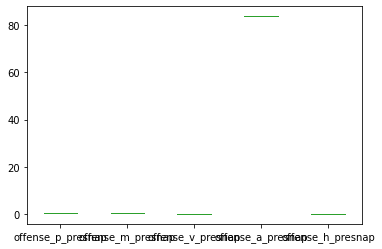

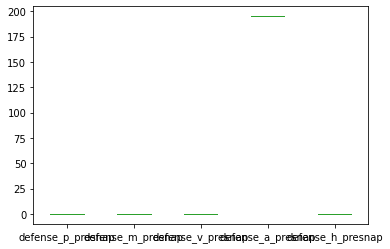

In [351]:
play_df[['offense_p_presnap', 'offense_m_presnap', 'offense_v_presnap', 'offense_a_presnap', 'offense_h_presnap']].plot.box()
play_df[['defense_p_presnap', 'defense_m_presnap', 'defense_v_presnap', 'defense_a_presnap', 'defense_h_presnap']].plot.box()

In [352]:
from sklearn.cluster import KMeans

In [353]:
def string_to_vector(s):
    s = s.split('[')[1].split(']')[0]
    x = float(s.split()[0])
    y = float(s.split()[1])
    return np.array([x, y])

def get_position_delta(row):
    return row.s / 10 * row.dir_vec

def get_relative_position(row):
    if row.frameId == 1:
        return np.array([0, 0])
    else:
        last_pos = row.shift(1).rel_pos
        return last_pos + row.pos_delta

In [354]:
tracking_df['pos'] = tracking_df['pos'].apply(string_to_vector)
tracking_df['o_vec'] = tracking_df['o_vec'].apply(string_to_vector)
tracking_df['dir_vec'] = tracking_df['dir_vec'].apply(string_to_vector)
tracking_df['r_vec'] = tracking_df['r_vec'].apply(string_to_vector)
tracking_df['pos_delta'] = tracking_df.apply(lambda x: get_position_delta(x), axis=1)

In [355]:
tracking_df.head()

,time,s,a,dis,event,nflId,displayName,jerseyNumber,position,frameId,...,gameId,playId,playDirection,route,pos,teamType,o_vec,dir_vec,r_vec,pos_delta
0,2018-09-07 01:07:14.599000+00:00,0.02,0.03,0.01,None,2495454,Julio Jones,11,WR,1,...,2018090600,75,left,HITCH,"[28.65, 9.14]",offense,"[0.93697745, -0.34938985]","[-0.29003414, -0.9570163]","[0.12496368, -0.99216132]","[-0.00058006828, -0.0019140326000000002]"
1,2018-09-07 01:07:14.599000+00:00,0.00,0.00,0.00,None,2533040,Mohamed Sanu,12,WR,1,...,2018090600,75,left,HITCH,"[29.22, 17.15]",offense,"[0.97670974, 0.21456486]","[0.24141382, 0.97042226]","[0.37023815, -0.92893687]","[0.0, 0.0]"
2,2018-09-07 01:07:14.599000+00:00,0.01,0.02,0.01,None,2555415,Austin Hooper,81,TE,1,...,2018090600,75,left,OUT,"[28.71, 31.47]",offense,"[0.94170565, 0.33643791]","[-0.47208925, 0.88155076]","[0.2063285, 0.97848278]","[-0.00047208925, 0.00088155076]"
3,2018-09-07 01:07:14.599000+00:00,0.01,0.01,0.01,None,2559033,Ricky Ortiz,30,FB,1,...,2018090600,75,left,FLAT,"[24.87, 26.59]",offense,"[0.94028813, 0.34037955]","[0.8412278, 0.54068086]","[-0.48834842, 0.87264874]","[0.0008412278, 0.00054068086]"
4,2018-09-07 01:07:14.700000+00:00,0.03,0.03,0.02,None,2495454,Julio Jones,11,WR,2,...,2018090600,75,left,HITCH,"[28.63, 9.13]",offense,"[0.93697745, -0.34938985]","[-0.49409361, -0.86940871]","[0.1238431, -0.99230181]","[-0.00148228083, -0.00260822613]"


In [356]:
players = tracking_df['nflId'].unique().tolist()
print(players)
arr = []

[2495454, 2533040, 2555415, 2559033]


In [357]:
for player in players:
    print(f'nflId: {player}')
    player_df = tracking_df.loc[(tracking_df['nflId'] == player)].copy()
    df_index = player_df.index.tolist()
    values = np.zeros(len(df_index) * 2).reshape(len(df_index), 2)
    for i in range(len(df_index)):
        if i == 0:
            values[i] = np.array([0, 0])
        else:
            print(values[i - 1], player_df.loc[df_index[i]][['s', 'pos_delta']])
            values[i] = values[i - 1] + player_df.loc[df_index[i]]['pos_delta']
    player_df['rel_pos'] = player_df.apply(lambda x: np.array([values[i][0], values[i][1]]), axis=1)
    arr.append(player_df)

nflId: 2495454
[0. 0.] s                                        0.03
pos_delta    [-0.00148228083, -0.00260822613]
Name: 4, dtype: object
[-0.00148228 -0.00260823] s                                        0.02
pos_delta    [-0.00106575256, -0.00169238634]
Name: 8, dtype: object
[-0.00254803 -0.00430061] s                                        0.02
pos_delta    [-0.00113338776, -0.00164785686]
Name: 12, dtype: object
[-0.00368142 -0.00594847] s                                                0.02
pos_delta    [-0.00125103008, -0.0015604242200000001]
Name: 16, dtype: object
[-0.00493245 -0.00750889] s                                                        0.01
pos_delta    [-0.0007200668500000001, -0.0006939047000000001]
Name: 20, dtype: object
[-0.00565252 -0.0082028 ] s                                                        0.01
pos_delta    [-0.0007833681200000001, -0.0006215580400000001]
Name: 24, dtype: object
[-0.00643589 -0.00882436] s                                        0.01
p